* 練習 minimax with alpha-beta pruning (AIMA Sec. 5.3) 考慮以下 game tree
  - ![game tree](./game.tree.alpha.beta.pruning.jpg)
  - 注意：這一棵 game tree 和 AIMA 圖5.2雖然類似，但是有不少差異
  - 提示：注意 AIMA Sec. 5.3.1 所講的 move ordering 問題
  - 假設我們在執行 AIMA 圖 5.7 演算法中 for each a in Action(state) do 的時候，都是從上面 game tree 左邊的節點開始、逐次往右搜尋的話，則上述哪一些 subtree 可以被忽略？說明原因。
  - 假設我們在執行 AIMA 圖 5.7 演算法中 for each a in Action(state) do 的時候，都是從上面 game tree 右邊的節點開始、逐次往左搜尋的話，則上述哪一些 subtree 可以被忽略？說明原因

## 第一小題，從左邊節點往右

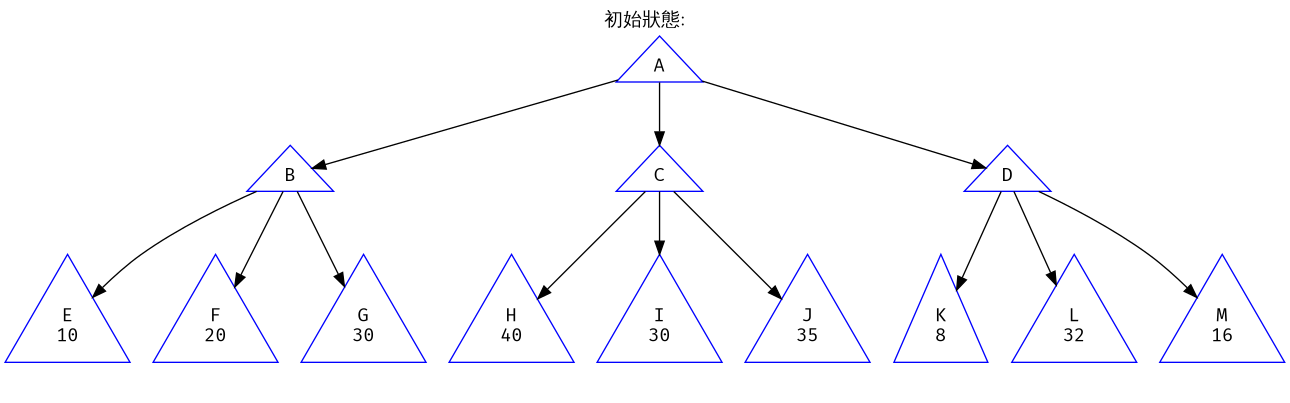

In [48]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "初始狀態:"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A", color=blue]
    
    B[shape=triangle, label="B", color=blue]
    C[shape=triangle, label="C", color=blue]
    D[shape=triangle, label="D", color=blue]
    
    A->B
    A->C
    A->D

    E[shape=triangle, label="E\n10", color=blue]
    F[shape=triangle, label="F\n20", color=blue]
    G[shape=triangle, label="G\n30", color=blue]
    H[shape=triangle, label="H\n40", color=blue]
    I[shape=triangle, label="I\n30", color=blue]
    J[shape=triangle, label="J\n35", color=blue]
    K[shape=triangle, label="K\n8", color=blue]
    L[shape=triangle, label="L\n32", color=blue]
    M[shape=triangle, label="M\n16", color=blue]
    
    B->E
    B->F
    B->G
    C->H
    C->I
    C->J
    D->K
    D->L
    D->M    
}


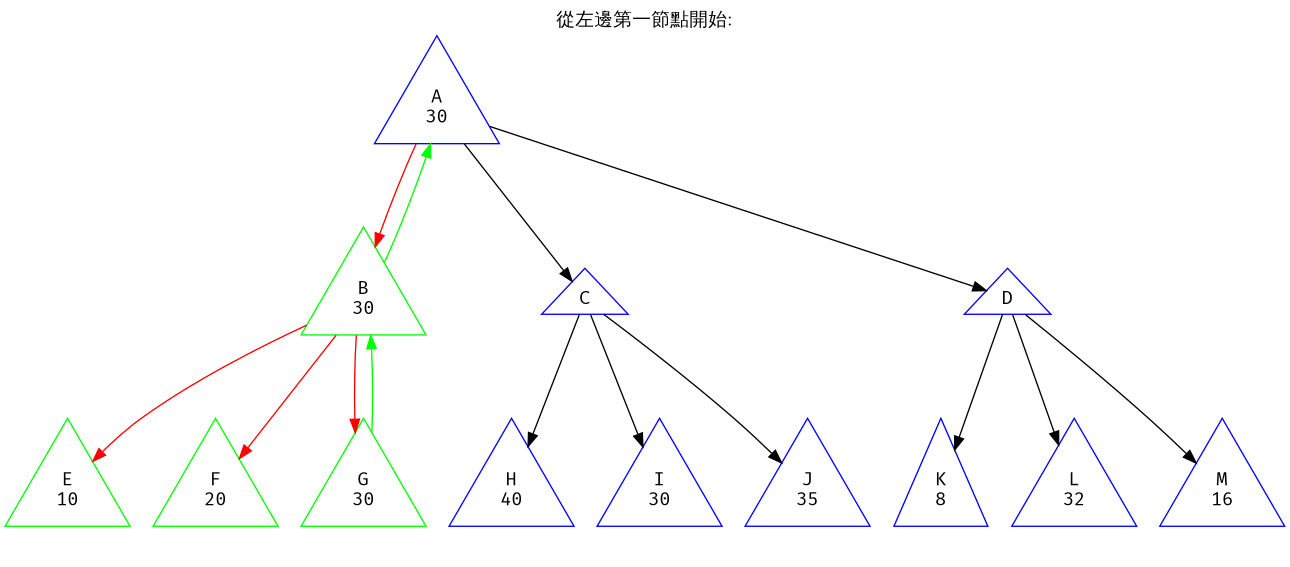

In [56]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "從左邊第一節點開始:"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A\n30", color=blue]
    
    B[shape=triangle, label="B\n30", color=green]
    C[shape=triangle, label="C", color=blue]
    D[shape=triangle, label="D", color=blue]
    
    A->B[color=red]
    B->A[color=green]
    A->C
    A->D

    E[shape=triangle, label="E\n10", color=green]
    F[shape=triangle, label="F\n20", color=green]
    G[shape=triangle, label="G\n30", color=green]
    H[shape=triangle, label="H\n40", color=blue]
    I[shape=triangle, label="I\n30", color=blue]
    J[shape=triangle, label="J\n35", color=blue]
    K[shape=triangle, label="K\n8", color=blue]
    L[shape=triangle, label="L\n32", color=blue]
    M[shape=triangle, label="M\n16", color=blue]
    
    B->E[color=red]
    B->F[color=red]
    B->G[color=red]
    G->B[color=green]
    C->H
    C->I
    C->J
    D->K
    D->L
    D->M    
}


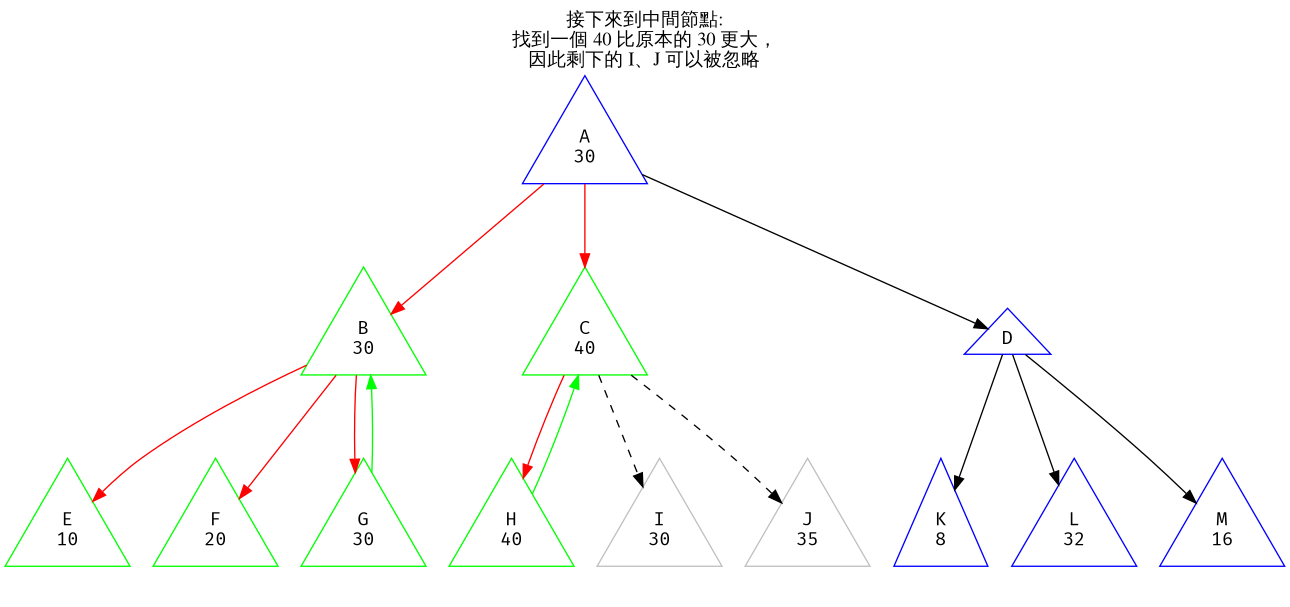

In [70]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "接下來到中間節點:\n找到一個 40 比原本的 30 更大，\n因此剩下的 I、J 可以被忽略"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A\n30", color=blue]
    
    B[shape=triangle, label="B\n30", color=green]
    C[shape=triangle, label="C\n40", color=green]
    D[shape=triangle, label="D", color=blue]
    
    A->B[color=red]
    A->C[color=red]
    A->D

    E[shape=triangle, label="E\n10", color=green]
    F[shape=triangle, label="F\n20", color=green]
    G[shape=triangle, label="G\n30", color=green]
    H[shape=triangle, label="H\n40", color=green]
    I[shape=triangle, label="I\n30", color=gray]
    J[shape=triangle, label="J\n35", color=gray]
    K[shape=triangle, label="K\n8", color=blue]
    L[shape=triangle, label="L\n32", color=blue]
    M[shape=triangle, label="M\n16", color=blue]
    
    B->E[color=red]
    B->F[color=red]
    B->G[color=red]
    G->B[color=green]
    C->H[color=red]
    H->C[color=green]
    C->I[style=dashed]
    C->J[style=dashed]
    D->K
    D->L
    D->M    
}


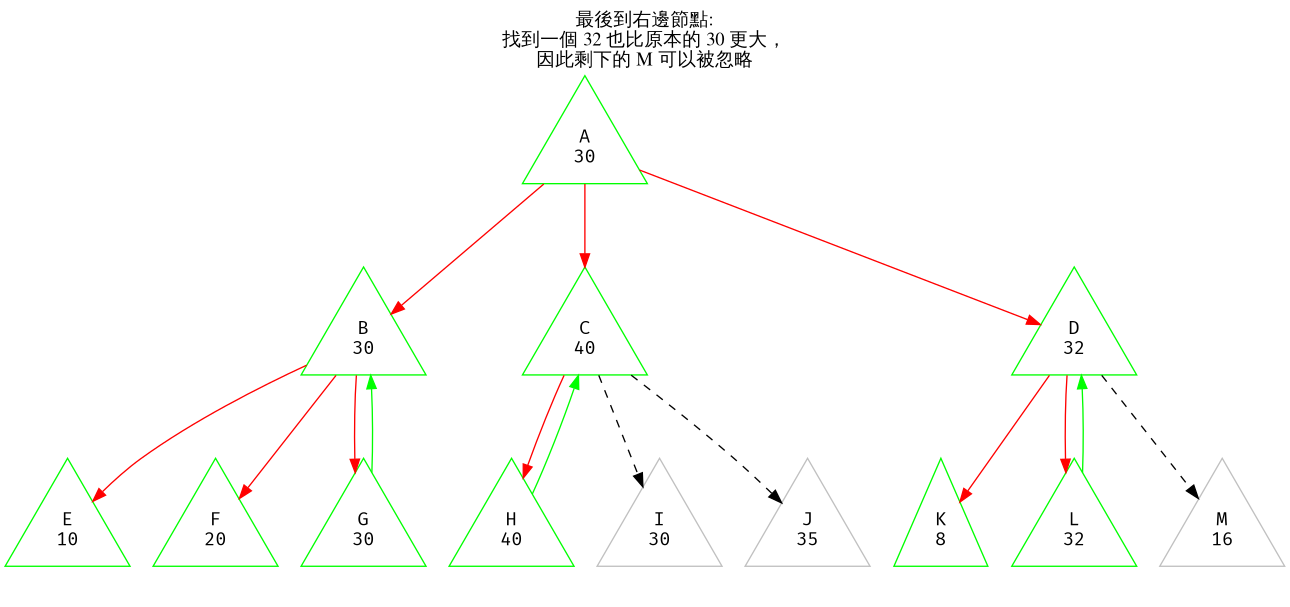

In [71]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "最後到右邊節點:\n找到一個 32 也比原本的 30 更大，\n因此剩下的 M 可以被忽略"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A\n30", color=green]
    
    B[shape=triangle, label="B\n30", color=green]
    C[shape=triangle, label="C\n40", color=green]
    D[shape=triangle, label="D\n32", color=green]
    
    A->B[color=red]
    A->C[color=red]
    A->D[color=red]

    E[shape=triangle, label="E\n10", color=green]
    F[shape=triangle, label="F\n20", color=green]
    G[shape=triangle, label="G\n30", color=green]
    H[shape=triangle, label="H\n40", color=green]
    I[shape=triangle, label="I\n30", color=gray]
    J[shape=triangle, label="J\n35", color=gray]
    K[shape=triangle, label="K\n8", color=green]
    L[shape=triangle, label="L\n32", color=green]
    M[shape=triangle, label="M\n16", color=gray]
    
    B->E[color=red]
    B->F[color=red]
    B->G[color=red]
    G->B[color=green]
    C->H[color=red]
    H->C[color=green]
    C->I[style=dashed]
    C->J[style=dashed]
    D->K[color=red]
    D->L[color=red]
    L->D[color=green]
    D->M[style=dashed]
}


**得出若從左邊開始，會找到 B，值為 30 的結果**

## 第二小題，從右至左

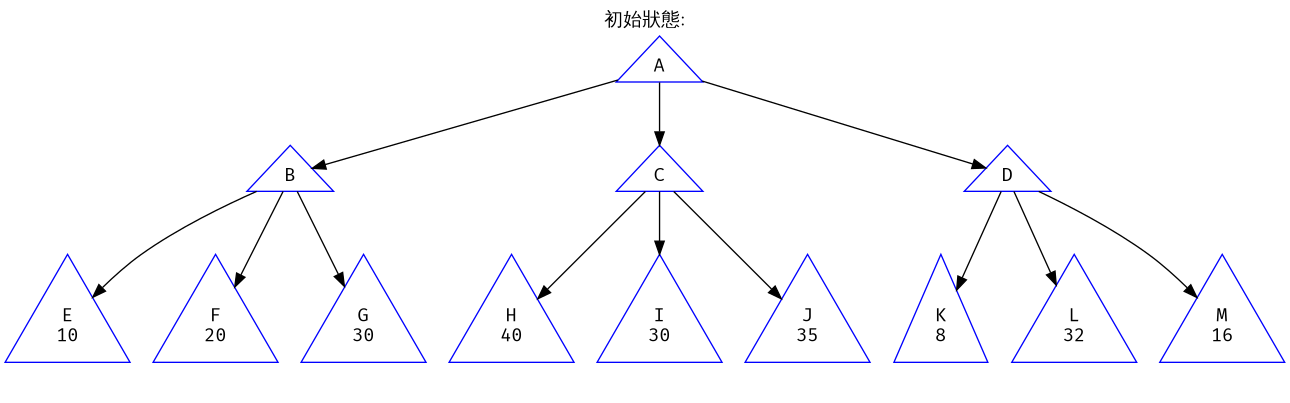

In [53]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "初始狀態:"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A", color=blue]
    
    B[shape=triangle, label="B", color=blue]
    C[shape=triangle, label="C", color=blue]
    D[shape=triangle, label="D", color=blue]
    
    A->B
    A->C
    A->D

    E[shape=triangle, label="E\n10", color=blue]
    F[shape=triangle, label="F\n20", color=blue]
    G[shape=triangle, label="G\n30", color=blue]
    H[shape=triangle, label="H\n40", color=blue]
    I[shape=triangle, label="I\n30", color=blue]
    J[shape=triangle, label="J\n35", color=blue]
    K[shape=triangle, label="K\n8", color=blue]
    L[shape=triangle, label="L\n32", color=blue]
    M[shape=triangle, label="M\n16", color=blue]
    
    B->E
    B->F
    B->G
    C->H
    C->I
    C->J
    D->K
    D->L
    D->M    
}

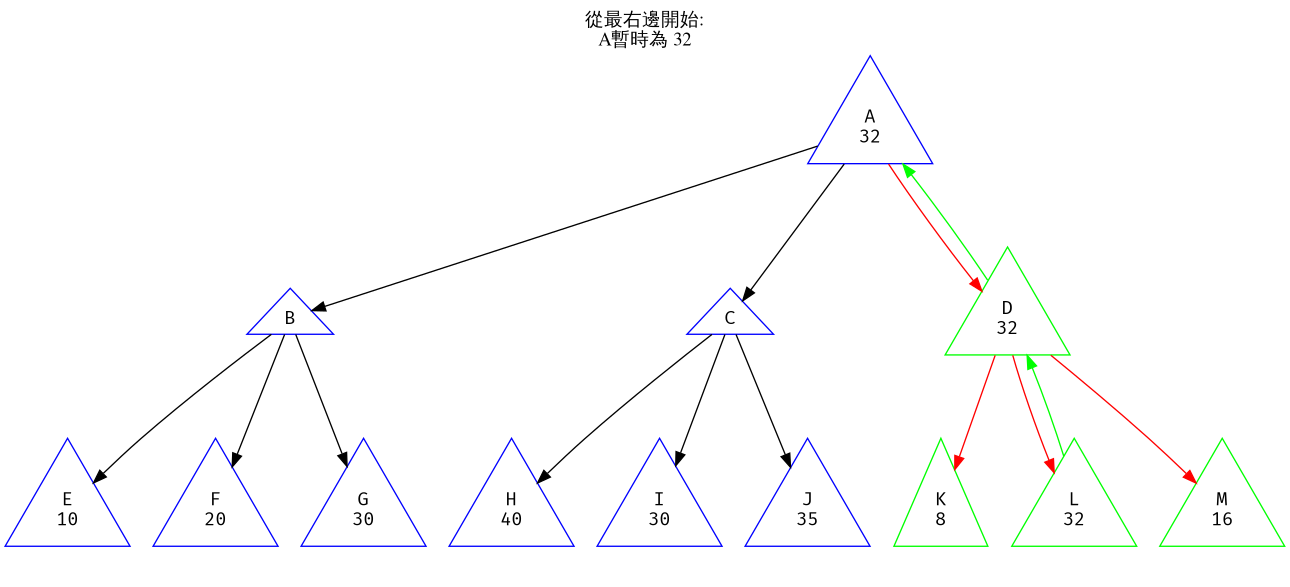

In [61]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "從最右邊開始:\nA暫時為 32"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A\n32", color=blue]
    
    B[shape=triangle, label="B", color=blue]
    C[shape=triangle, label="C", color=blue]
    D[shape=triangle, label="D\n32", color=green]
    
    A->B
    A->C
    A->D[color=red]
    D->A[color=green]

    E[shape=triangle, label="E\n10", color=blue]
    F[shape=triangle, label="F\n20", color=blue]
    G[shape=triangle, label="G\n30", color=blue]
    H[shape=triangle, label="H\n40", color=blue]
    I[shape=triangle, label="I\n30", color=blue]
    J[shape=triangle, label="J\n35", color=blue]
    K[shape=triangle, label="K\n8", color=green]
    L[shape=triangle, label="L\n32", color=green]
    M[shape=triangle, label="M\n16", color=green]
    
    B->E
    B->F
    B->G
    C->H
    C->I
    C->J
    D->K[color=red]
    D->L[color=red]
    L->D[color=green]
    D->M[color=red]
}

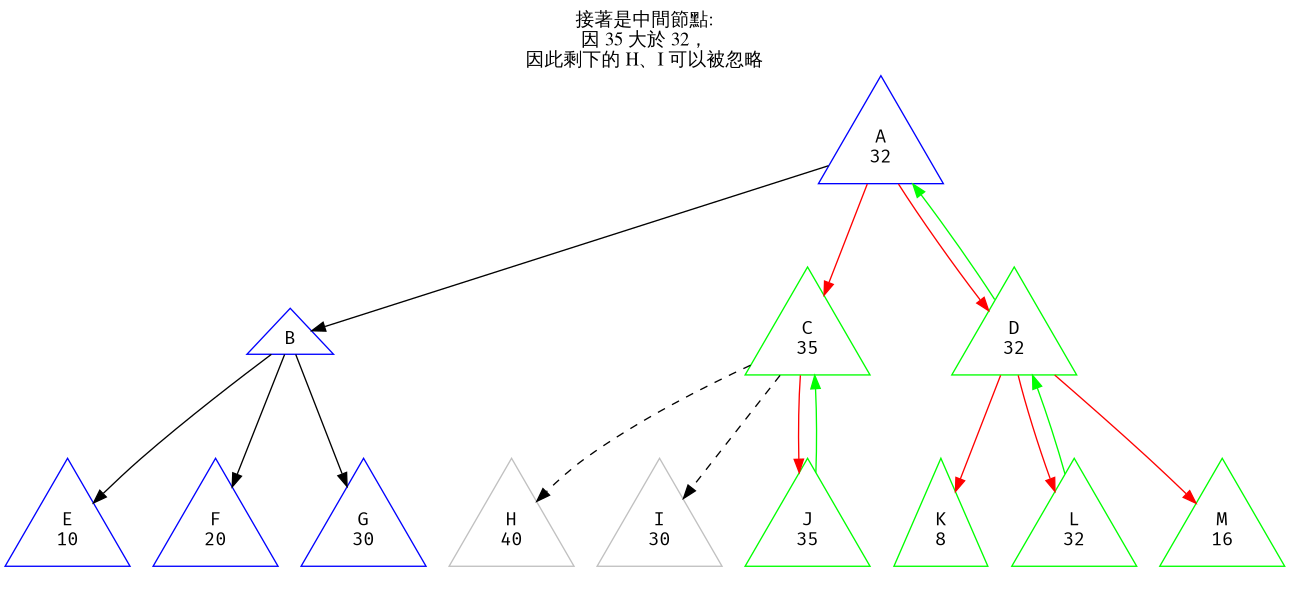

In [72]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "接著是中間節點:\n因 35 大於 32，\n因此剩下的 H、I 可以被忽略"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A\n32", color=blue]
    
    B[shape=triangle, label="B", color=blue]
    C[shape=triangle, label="C\n35", color=green]
    D[shape=triangle, label="D\n32", color=green]
    
    A->B
    A->C[color=red]
    A->D[color=red]
    D->A[color=green]

    E[shape=triangle, label="E\n10", color=blue]
    F[shape=triangle, label="F\n20", color=blue]
    G[shape=triangle, label="G\n30", color=blue]
    H[shape=triangle, label="H\n40", color=gray]
    I[shape=triangle, label="I\n30", color=gray]
    J[shape=triangle, label="J\n35", color=green]
    K[shape=triangle, label="K\n8", color=green]
    L[shape=triangle, label="L\n32", color=green]
    M[shape=triangle, label="M\n16", color=green]
    
    B->E
    B->F
    B->G
    C->H[style=dashed]
    C->I[style=dashed]
    C->J[color=red]
    J->C[color=green]
    D->K[color=red]
    D->L[color=red]
    L->D[color=green]
    D->M[color=red]
}

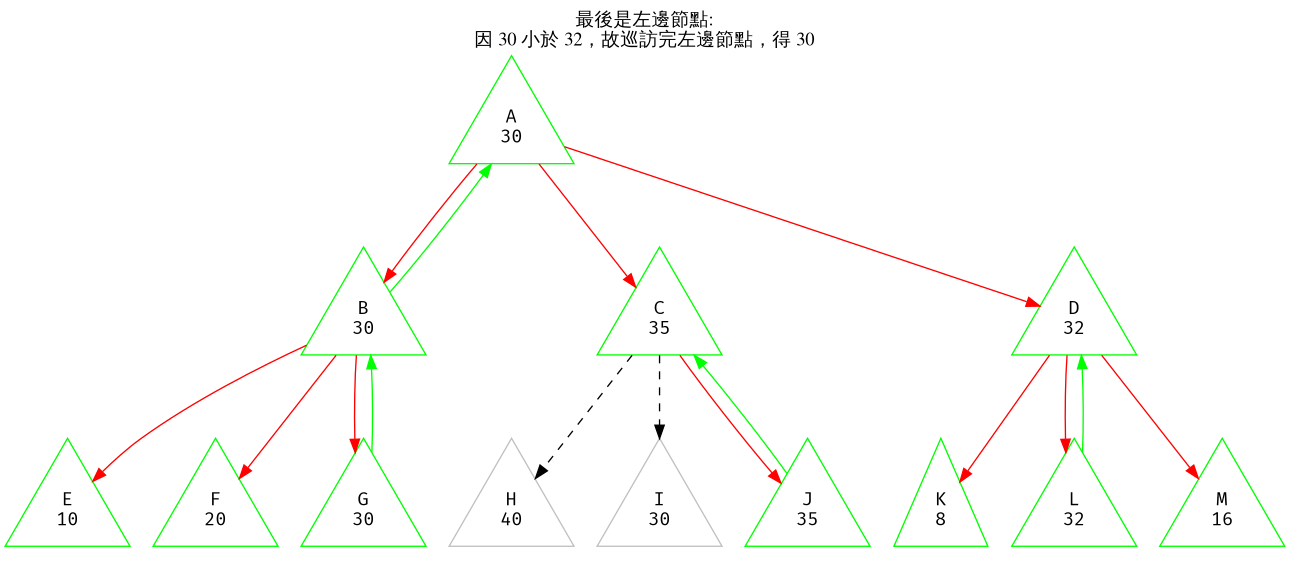

In [67]:
digraph {
    labelloc = "t"
    labelfontname = "文泉驛微米黑"
    label = "最後是左邊節點:\n因 30 小於 32，故巡訪完左邊節點，得 30"

    node [fontname="Fira Mono"]
    
    A[shape=triangle, label="A\n30", color=green]
    
    B[shape=triangle, label="B\n30", color=green]
    C[shape=triangle, label="C\n35", color=green]
    D[shape=triangle, label="D\n32", color=green]
    
    A->B[color=red]
    B->A[color=green]
    A->C[color=red]
    A->D[color=red]

    E[shape=triangle, label="E\n10", color=green]
    F[shape=triangle, label="F\n20", color=green]
    G[shape=triangle, label="G\n30", color=green]
    H[shape=triangle, label="H\n40", color=gray]
    I[shape=triangle, label="I\n30", color=gray]
    J[shape=triangle, label="J\n35", color=green]
    K[shape=triangle, label="K\n8", color=green]
    L[shape=triangle, label="L\n32", color=green]
    M[shape=triangle, label="M\n16", color=green]
    
    B->E[color=red]
    B->F[color=red]
    B->G[color=red]
    G->B[color=green]
    C->H[style=dashed]
    C->I[style=dashed]
    C->J[color=red]
    J->C[color=green]
    D->K[color=red]
    D->L[color=red]
    L->D[color=green]
    D->M[color=red]
}

* 模仿上課時以真值表證明 $P \Rightarrow Q \equiv \lnot Q \Rightarrow \lnot P$ 的方式 (在白板上寫的證明)，證明以下關係
  - $P \Rightarrow Q \equiv \lnot P \lor Q$

### 依下列 truth table 之推導，可得

$$
P \Rightarrow Q \equiv {\lnot}P \lor Q
$$

$P$  |  $Q$  | ${\lnot}P$ | $P{\Rightarrow}Q$ | ${\lnot}P{\lor}Q$
 ---- | ---- | ---- | ---- | ---- 
 T | T | F | T | T
 T | F | F | F | F
 F | T | T | T | T
 F | F | T | T | T

* 模仿 simple.proof.pdf 證明 $P_{2,2}$ 不成立$(P_{2,2} = False)$ 的程序，利用以下的 logic sentences，證明 $W_{2,2}$ 也不成立。
  - 參考 AI.logical.agents.pdf 第18頁上的說明，或者 AIMA Sec. 7.4.3 (p. 247) 的內容，我們使用 W 和 S 的符號
    1. R1: $W_{1,3} \Rightarrow S_{1,2} \land S_{2,3} \land S_{1,4}$
    1. R2: $S_{1,2} \Rightarrow W_{1,1} \lor W_{2,2} \lor W_{1,3}$
    1. R3: $W_{2,2} \Rightarrow S_{1,2} \land S_{3,2} \land S_{2,1} \land S_{2,3}$
    1. R4: $S_{2,1} \Rightarrow W_{1,1} \lor W_{2,2} \lor W_{3,1}$
    1. F1: $\lnot S_{1,1}$
    1. F2: $S_{1,2}$
    1. F3: $\lnot S_{2,1}$
    1. F4: $\lnot W_{1,1}$

1. 先用 implication elimination 推導 3：
    * R5: $W_{2,2} \Rightarrow S_{1,2} \land S_{3,2} \land S_{2,1} \land S_{2,3} \equiv \lnot W_{2,2} \lor (S_{1,2} \land S_{3,2} \land S_{2,1} \land S_{2,3})$
1. 再以 F3，推導出：
    * R6: $S_{1,2} \land S_{3,2} \land S_{2,1} \land S_{2,3}$ 為 false 當給定 ${\lnot}S_{2,1}$ 為 true
1. 而當 $S_{1,2} \land S_{3,2} \land S_{2,1} \land S_{2,3}$ 為 false，且上述 R5 為 true 成立時，只有一個情況：
    * R7: ${\lnot}W_{2,2}$ 為 true
1. 故得證：
    * R8: $W_{2,2}$ 為 false